In [17]:
#Library's imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig

# Exercise 1
На вход передатчика подается некоторый сигнал во времени. В качестве сигнала
возможно рассмотреть сигнал прямоугольных периодических импульсов.

Реализовать свертку сигнала с некоторым ядром во временной области.

В качестве ядра свертки использовать (а) y=A•exp(-x^2), (б) любую линейную функцию.

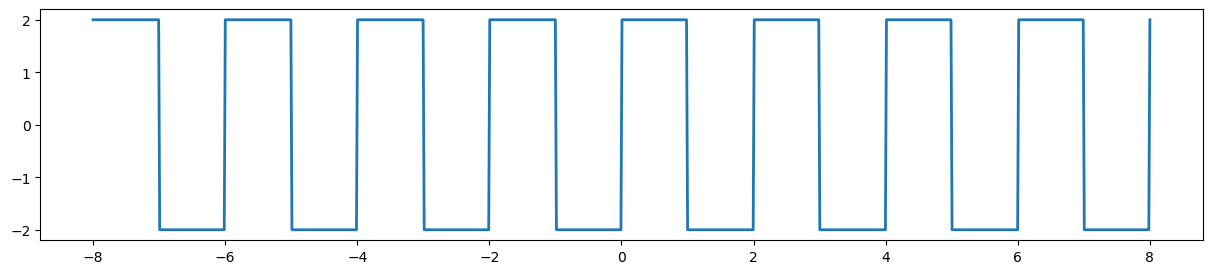

In [18]:
def square_signal(t, A, T):
    '''
    Функция возвращает значение прямоугольного сигнала в заданный момент времени t.
    t - момент времени, A - амплитуда сигнала, T - период сигнала.
    '''
    return A * sig.square(2 * np.pi * t / T)

# Генерация сигнала
A_square = 2
T_square = 2
num_square = 1000
t = np.linspace(-4 * T_square, 4 * T_square, num_square)
signal = square_signal(t, A_square, T_square)
plt.figure(figsize=(15, 3))
plt.plot(t, signal, linewidth=2)
plt.show()

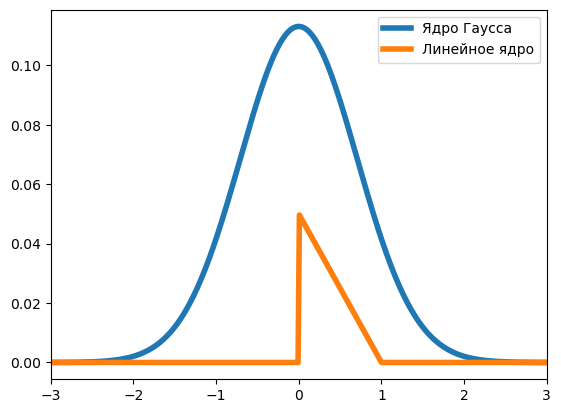

In [19]:
# Ядро свертки (a)
# A * np.exp(-x**2) функция
def kernel_norm(A, t):
    y = A * np.exp(-t**2)
    y /= np.sqrt(np.sum((np.abs(y))**2))
    return y

# Ядро свертки (б)
# Любая линейная функция, например y = Ax + B
def kernel_line(A, t):
    y0 = 0.05
    t0 = 0
    B = -A*t0 + y0
    y = A*t + B
    y[(t < 0) | (t > 1)] = 0
    y = np.where(((y > y0) | (y < 0)), 0, y)
    return y

yk1 = kernel_norm(1, t)
yk2 = kernel_line(-0.05, t)

plt.plot(t, yk1, linewidth=4)
plt.plot(t, yk2, linewidth=4)
plt.xlim(-3, 3)
plt.legend(['Ядро Гаусса', 'Линейное ядро'])
plt.show()

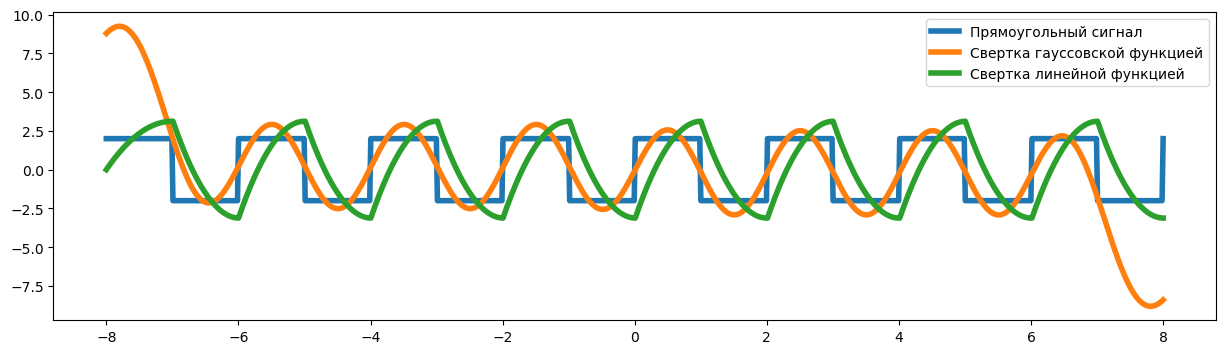

In [20]:
# Свертка сигнала с ядром (a) и с ядром (б)
convolved_signal_norm = np.convolve(signal, yk1, mode='same')
convolved_signal_line = np.convolve(signal, yk2, mode='same')
plt.figure(figsize=(15, 4))

plt.plot(t, signal, linewidth=4)
plt.plot(t, convolved_signal_norm, linewidth=4)
plt.plot(t, convolved_signal_line, linewidth=4)
plt.legend(['Прямоугольный сигнал', 'Свертка гауссовской функцией', 'Свертка линейной функцией'])
plt.show()

# Exercise 2
Чтобы разобраться в алгоритме свертки двух сигналов – реализуйте свой
алгоритм, осуществляющий свертку сигнала с произвольным ядром.

In [21]:
def convolution(signal, kernel, mode='full'):
    signal_length = len(signal)
    kernel_length = len(kernel)
    convolved_signal = [0] * (signal_length  + kernel_length  - 1)
    
    for i in range(signal_length):
        for j in range(kernel_length):
            convolved_signal[i+j] += signal[i] * kernel[j]

    if mode == 'same':
        # Обрезка результата до длины самого длинного входного массива
        if signal_length > kernel_length:
            convolved_signal = convolved_signal[(kernel_length-1)//2 : (kernel_length-1)//2 + signal_length]
        else:
            convolved_signal = convolved_signal[(signal_length-1)//2 : (signal_length-1)//2 + kernel_length]

    return np.array(convolved_signal)

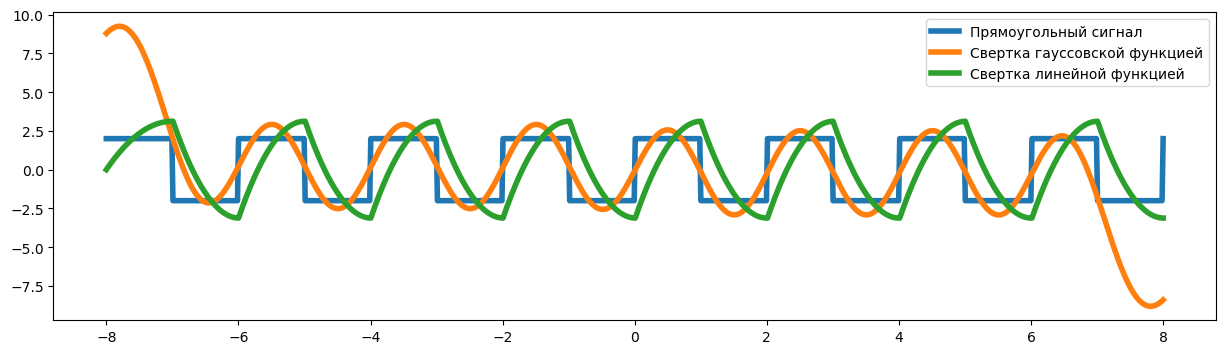

In [22]:
# Пример использования своей функции свертки
custom_convolved_signal1 = convolution(signal, yk1, 'same')
custom_convolved_signal2 = convolution(signal, yk2, 'same')

plt.figure(figsize=(15, 4))

plt.plot(t, signal, linewidth=4)
plt.plot(t, convolved_signal_norm, linewidth=4)
plt.plot(t, convolved_signal_line, linewidth=4)
plt.legend(['Прямоугольный сигнал', 'Свертка гауссовской функцией', 'Свертка линейной функцией'])
plt.show()

# Exercise 3
Для любого выбранного Вами ядра свертки убедиться, что свертка во временной
области эквивалентна умножению в частотной области (теорема о свертке).

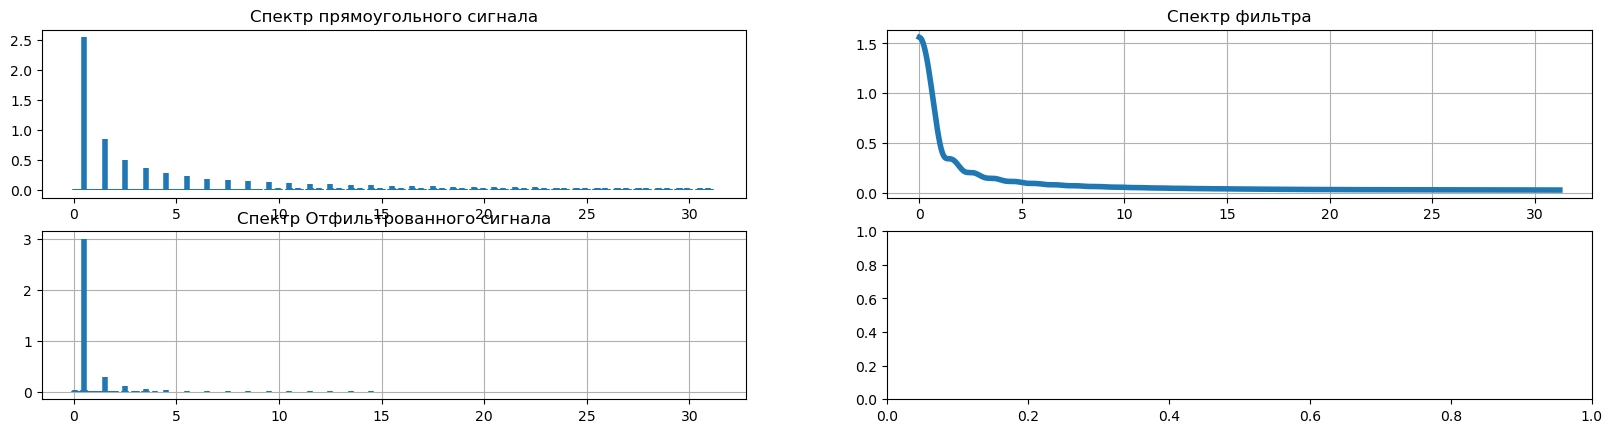

In [23]:
#Переход в частотный пространство и произведение спектров (фильтрация)
freq_square = np.fft.rfftfreq(len(t), d=(t[1]-t[0]))
yff = np.fft.rfft(signal)
yk2ff = np.fft.rfft(yk2)
yff_filtk2 = yff * yk2ff

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(20)

axs[0][0].set_title("Спектр прямоугольного сигнала")
axs[0][0].vlines(freq_square, 0, np.abs(yff) / num_square * 2, linewidth=4)
axs[0][1].set_title("Спектр фильтра")
axs[0][1].plot(freq_square, np.abs(yk2ff), linewidth=4)
axs[0][1].grid()
axs[1][0].set_title("Спектр Отфильтрованного сигнала")
axs[1][0].vlines(freq_square, 0, np.abs(yff_filtk2) / num_square * 2, linewidth=4)
axs[1][0].grid()
plt.show()

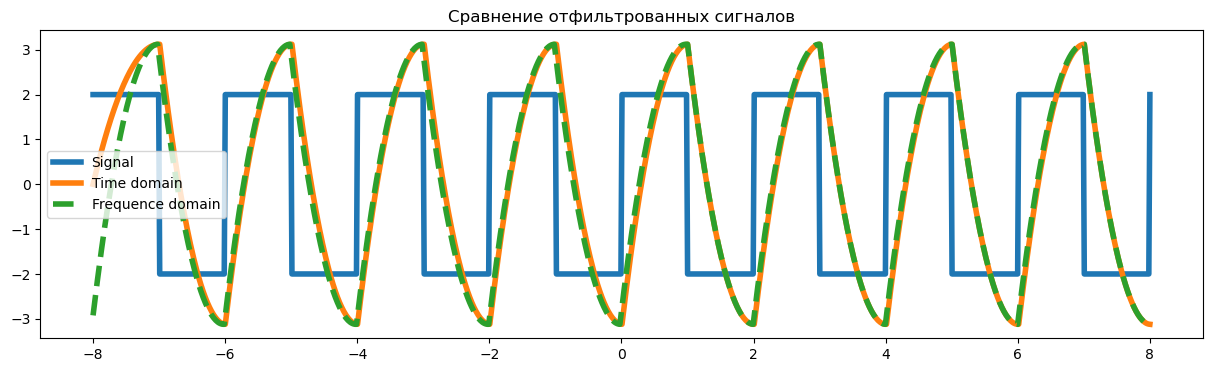

In [24]:
signal_filtered_freq_k2 = np.fft.irfft(yff_filtk2)

#Имеем два сигнала: отфильтрованный в пространстве частот, "отфильтрованный" конволюцией
plt.figure(figsize=(15, 4))
plt.title("Сравнение отфильтрованных сигналов")
plt.plot(t, signal, linewidth=4)
plt.plot(t, convolved_signal_line, linewidth=4)
plt.plot(t, signal_filtered_freq_k2, linestyle='--', linewidth=4)
plt.legend(['Signal', 'Time domain', 'Frequence domain'])
plt.show()

# Exercise 4
Разобраться в реализации свертки с ядром Гаусса для реализации
сглаживающего фильтра во временной области.

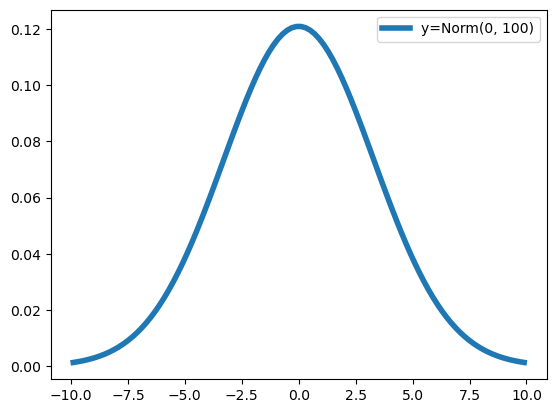

In [25]:
def gaussian_kernel(sigma, size):
    x = np.linspace(-3 * sigma, 3 * sigma, size)
    y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x**2) / (2 * sigma**2))
    return x, y #/np.sum((np.abs(y))) #/ np.sqrt(np.sum((np.abs(y))**2))

# Создание ядра Гаусса для сглаживания
gaussian_size = 3.3
gaussian_sigma = 100
x_gaussian, y_gaussian = gaussian_kernel(gaussian_size, gaussian_sigma)
plt.plot(x_gaussian, y_gaussian, linewidth=4)
plt.legend([f'y=Norm(0, {gaussian_sigma})'])
plt.show()


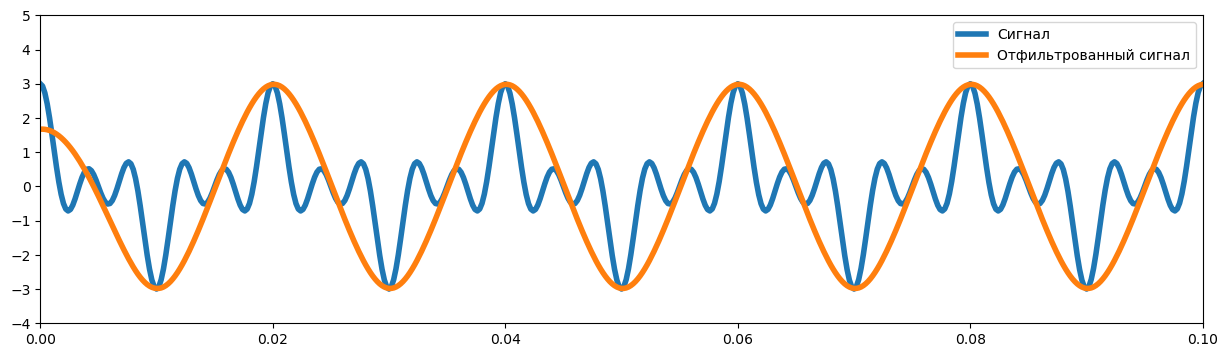

In [26]:
def cos_signal(t, freqs, A=1):
    '''
    Функция возвращает значение косинусоидального сигнала в заданный момент времени t.
    t - время, freqs - список частот сигнала, A - амплитуда сигнала.
    '''
    y = sum([A * np.cos(2 * np.pi * freq * t) for freq in freqs])
    return y

num_cos = 10000  # количество отсчетов
freqs = [50, 150, 250]

# создание сигнала
t_cos = np.linspace(0, 2, num_cos)
y_cos = cos_signal(t_cos, freqs)

# свертка
smoothed_signal = np.convolve(y_cos, y_gaussian, mode='same')

plt.figure(figsize=(15,4))

plt.plot(t_cos, y_cos, label="Сигнал", linewidth=4)
plt.plot(t_cos, smoothed_signal, label="Отфильтрованный сигнал", linewidth=4)
plt.xlim(0, 0.1)
plt.ylim(-4, 5)
plt.legend()
plt.show()

# Exercise 5
Реализовать пункт (4) в частотной области. Убедиться, что результаты совпадают.
Настройте параметры ядра Гаусса таким образом, чтобы реализовать: (а) узкополосной
фильтр (б) фильтр нижних частот

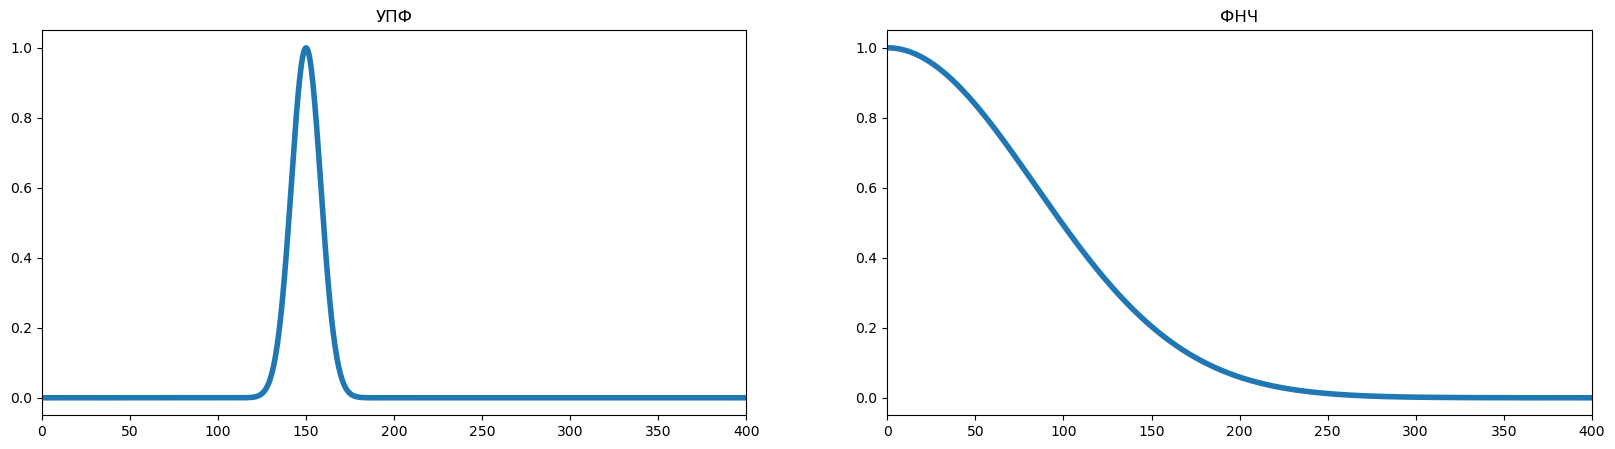

In [27]:
freq_cos = np.fft.rfftfreq(len(t_cos), d=(t_cos[1]-t_cos[0]))
y_cos_ff = np.fft.rfft(y_cos)

def freq_gaussian_kernel(freq, peak, fwhm):
    s = fwhm * (2 * np.pi - 1) / (4 * np.pi)
    g = np.exp(-0.5 * ((freq - peak) / s)**2)
    return g

gaussian_narrowband_filter = freq_gaussian_kernel(freq_cos, freqs[1], 20)
gaussian_lowpass_filter = freq_gaussian_kernel(freq_cos, 0, freqs[0]*4)

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].set_title("УПФ")
axs[0].plot(freq_cos, gaussian_narrowband_filter, linewidth=4)
axs[0].set_xlim(0, 400)
axs[1].set_title("ФНЧ")
axs[1].plot(freq_cos, gaussian_lowpass_filter, linewidth=4)
axs[1].set_xlim(0, 400)
plt.show()

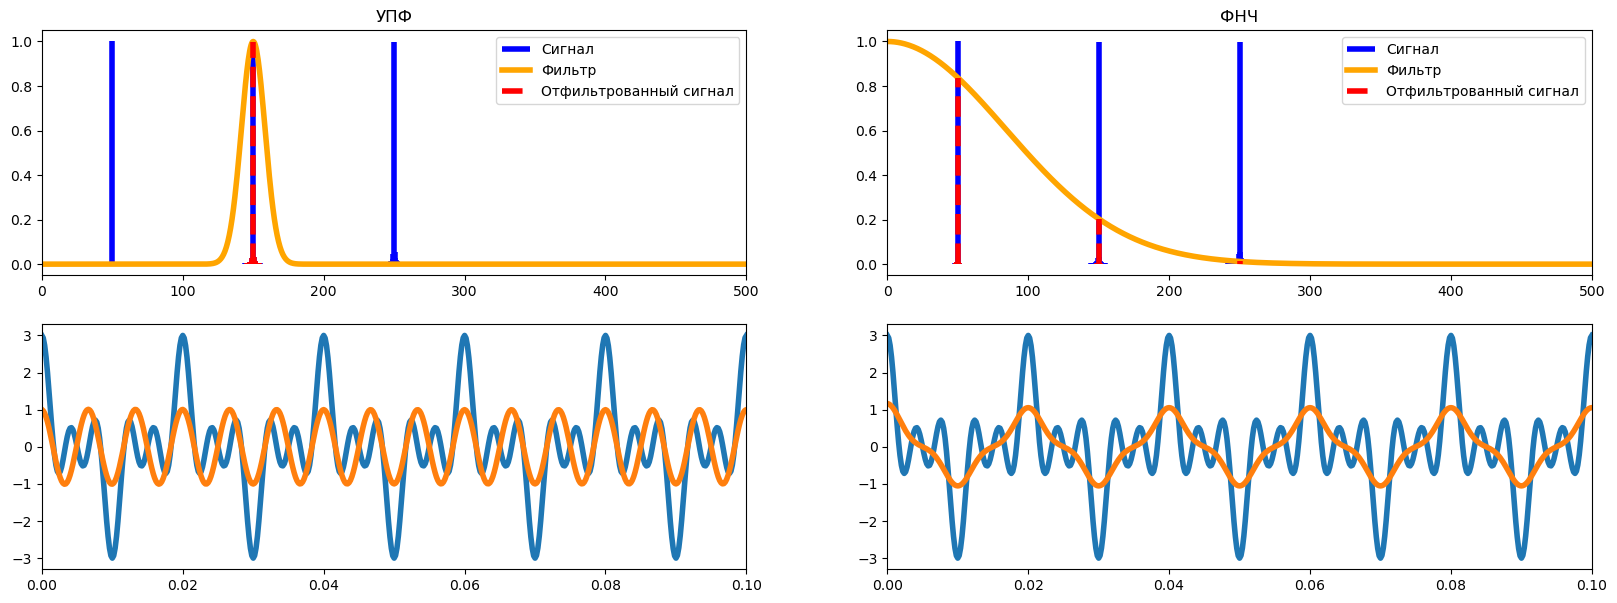

In [28]:
yff_narrowband = y_cos_ff * gaussian_narrowband_filter
yf_narrowband = np.fft.irfft(yff_narrowband)

yff_lowpass = y_cos_ff * gaussian_lowpass_filter
yf_lowpass = np.fft.irfft(yff_lowpass)

fig, axs = plt.subplots(2, 2)
fig.set_figheight(7)
fig.set_figwidth(20)

axs[0, 0].set_title("УПФ")

axs[0, 0].vlines(freq_cos, 0, np.abs(y_cos_ff) / num_cos * 2, linewidth=4, color='blue', label="Сигнал")
axs[0, 0].plot(freq_cos, gaussian_narrowband_filter, color='orange', linewidth=4, label="Фильтр")
axs[0, 0].vlines(freq_cos, 0, np.abs(yff_narrowband) / num_cos * 2, color='r', linestyle="--", linewidth=4, label="Отфильтрованный сигнал")
axs[0, 0].legend()
axs[0, 0].set_xlim(0, 500)

axs[1, 0].plot(t_cos, y_cos, linewidth=4)
axs[1, 0].plot(t_cos, yf_narrowband, linewidth=4)
axs[1, 0].set_xlim(0, 0.1)

axs[0, 1].set_title("ФНЧ")

axs[0, 1].vlines(freq_cos, 0, np.abs(y_cos_ff) / num_cos * 2, linewidth=4, color='blue', label="Сигнал")
axs[0, 1].plot(freq_cos, gaussian_lowpass_filter, color='orange', linewidth=4, label="Фильтр")
axs[0, 1].vlines(freq_cos, 0, np.abs(yff_lowpass) / num_cos * 2, color='r', linestyle="--", linewidth=4, label="Отфильтрованный сигнал")
axs[0, 1].legend()
axs[0, 1].set_xlim(0, 500)

axs[1, 1].plot(t_cos, y_cos, linewidth=4)
axs[1, 1].plot(t_cos, yf_lowpass, linewidth=4)
axs[1, 1].set_xlim(0, 0.1)
plt.show()
plt.show()

# Exercise 6
Реализовать полосовой фильтр, используя окно Планка.

In [29]:
def freq_plank_window(freq_cos, start_freq, end_freq, eps=0.25):

    def z(k, num, eps, mode):
        if mode == 'a':
            return eps * (num - 1) * (1 / k + 1 / (k - eps * (num - 1)))
        elif mode == 'b':
            return eps * (num - 1) * (1 / (num - 1 - k) + 1 / ((1 - eps) * (num - 1) - k))
        return None
    
    num = np.sum((start_freq < freq_cos) & (freq_cos < end_freq))
    k = np.arange(num)

    result = np.zeros(num)

    result = np.where((0 < k) & (k < eps * (num - 1)), 
                      1 / (np.exp(z(k, num, eps, 'a')) + 1), result)

    result = np.where((eps * (num - 1) <= k) & (k <= (1 - eps) * (num - 1)), 
                      1, result)

    result = np.where(((1 - eps) * (num - 1) < k) & (k < num - 1), 
                      1 / (np.exp(z(k, num, eps, 'b')) + 1), result)

    plank_window = np.zeros_like(freq_cos)

    plank_window[(start_freq <= freq_cos) & (freq_cos <= end_freq)] = result
    
    return plank_window

C:\Users\searg\AppData\Local\Temp\ipykernel_20892\1956505656.py:5: RuntimeWarning: divide by zero encountered in divide
  return eps * (num - 1) * (1 / k + 1 / (k - eps * (num - 1)))
C:\Users\searg\AppData\Local\Temp\ipykernel_20892\1956505656.py:7: RuntimeWarning: divide by zero encountered in divide
  return eps * (num - 1) * (1 / (num - 1 - k) + 1 / ((1 - eps) * (num - 1) - k))


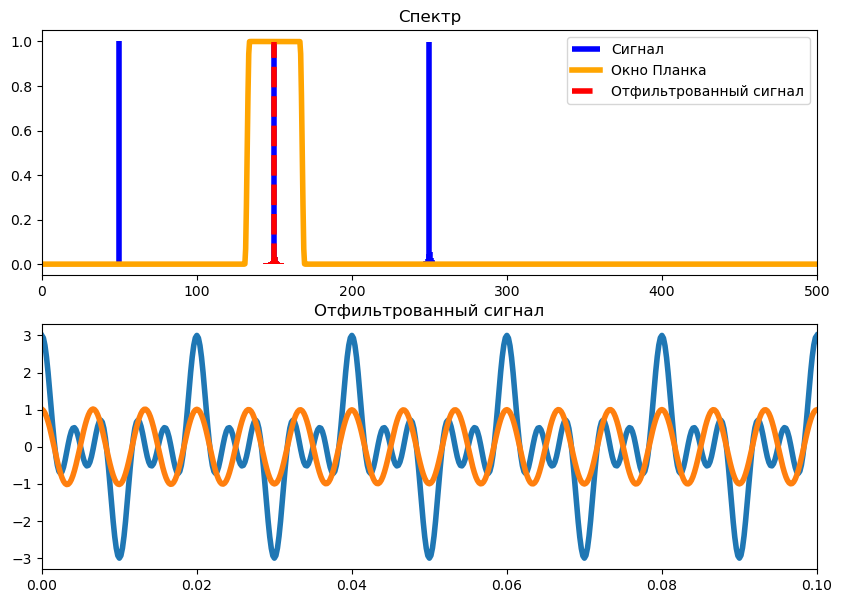

In [30]:
plank_window = freq_plank_window(freq_cos, start_freq=130, end_freq=170, eps=0.1)
yff_filtered = y_cos_ff * plank_window
yf_filtered_3 = np.fft.irfft(yff_filtered)

fig, axs = plt.subplots(2)
fig.set_figheight(7)
fig.set_figwidth(10)

axs[0].set_title("Спектр")
axs[0].vlines(freq_cos, 0, np.abs(y_cos_ff) / num_cos * 2, linewidth=4, color='blue', label="Сигнал")
axs[0].plot(freq_cos, plank_window, color='orange', linewidth=4, label="Окно Планка")
axs[0].vlines(freq_cos, 0, np.abs(yff_filtered) / num_cos * 2, color='r', linestyle="--", linewidth=4, label="Отфильтрованный сигнал")
axs[0].legend()
axs[0].set_xlim(0, 500)

axs[1].set_title("Отфильтрованный сигнал")
axs[1].plot(t_cos, y_cos, linewidth=4)
axs[1].plot(t_cos, yf_filtered_3, linewidth=4)
axs[1].set_xlim(0, 0.1)
plt.show()

# Exercise 7
Сравнить результат фильтрации зашумленного сигнала при использовании ядра
Гаусса и окна Планка.

In [31]:
def add_noise(signal, noise_level=1):
    '''
    Добавление к сигналу гауссовского шума 
    '''
    return signal + np.random.normal(0, noise_level, signal.shape)

y_noised = add_noise(y_cos, 2)

C:\Users\searg\AppData\Local\Temp\ipykernel_20892\1956505656.py:5: RuntimeWarning: divide by zero encountered in divide
  return eps * (num - 1) * (1 / k + 1 / (k - eps * (num - 1)))
C:\Users\searg\AppData\Local\Temp\ipykernel_20892\1956505656.py:7: RuntimeWarning: divide by zero encountered in divide
  return eps * (num - 1) * (1 / (num - 1 - k) + 1 / ((1 - eps) * (num - 1) - k))


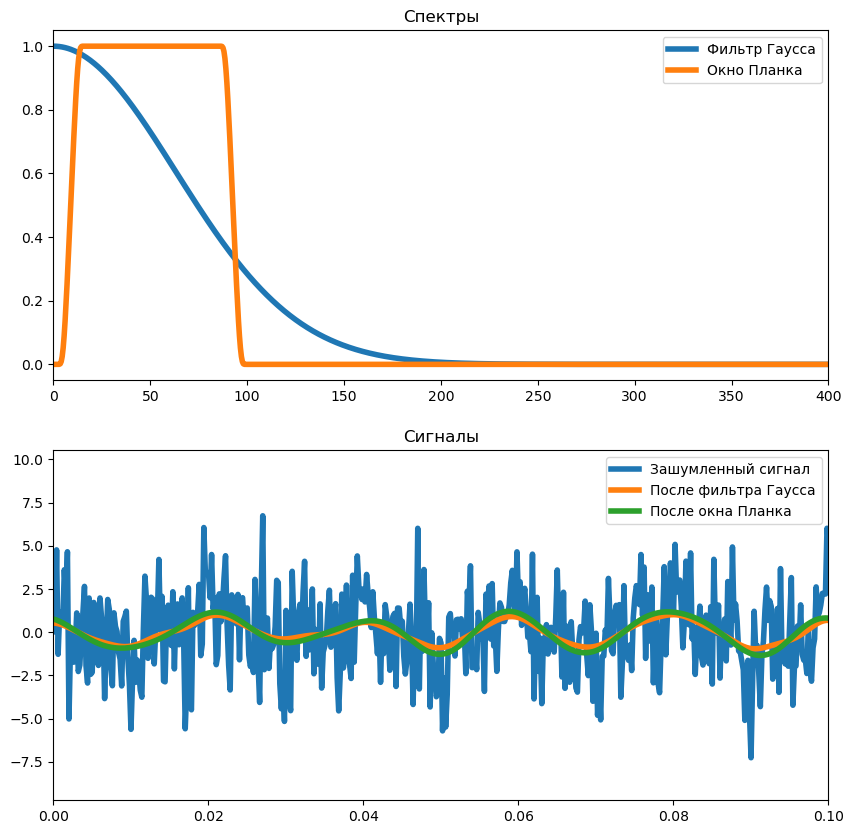

In [32]:
gaussian_lowpass_filter_2 = freq_gaussian_kernel(freq_cos, 0, freqs[0]*3)
plank_window_2 = freq_plank_window(freq_cos, start_freq=1, end_freq=100, eps=0.15)

yff_noised = np.fft.rfft(y_noised)

yff_filtered_gauss = yff_noised * gaussian_lowpass_filter_2
yff_filtered_plank = yff_noised * plank_window_2

yf_filtered_gauss = np.fft.irfft(yff_filtered_gauss)
yf_filtered_plank = np.fft.irfft(yff_filtered_plank)

fig, axs = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(10)

axs[0].set_title("Спектры")
axs[0].plot(freq_cos, gaussian_lowpass_filter_2, linewidth=4, label="Фильтр Гаусса")
axs[0].plot(freq_cos, plank_window_2, linewidth=4, label="Окно Планка")
axs[0].legend()
axs[0].set_xlim(0, 400)

axs[1].set_title("Cигналы")
axs[1].plot(t_cos, y_noised, linewidth=4, label="Зашумленный сигнал")
axs[1].plot(t_cos, yf_filtered_gauss, linewidth=4, label="После фильтра Гаусса")
axs[1].plot(t_cos, yf_filtered_plank, linewidth=4, label="После окна Планка")
axs[1].set_xlim(0, 0.1)
axs[1].legend()
plt.show()